# SI 370 Kaggle: Restaurant Revenue Predictions

In [50]:
import pandas as pd
import numpy as np
import math
from datetime import datetime

import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd

from sklearn import metrics
import os

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [94]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [67]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [68]:
test.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

In [69]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [95]:
## Convert the dates to number of open days 

train['Open Date'] = pd.to_datetime(train['Open Date'], format='%m/%d/%Y')
test['Open Date'] = pd.to_datetime(test['Open Date'], format='%m/%d/%Y')

date_format = "%m/%d/%Y"
recent_date = datetime.strptime('11/19/2019', date_format)

train['OpenDays'] = recent_date - train['Open Date']
train['OpenDays'] = train['OpenDays'].astype('timedelta64[D]').astype(int)
train = train.drop(columns = ['Open Date', 'Id'], axis = 1)

test['OpenDays'] = recent_date - test['Open Date']
test['OpenDays'] = test['OpenDays'].astype('timedelta64[D]').astype(int)
test = test.drop(columns = ['Open Date', 'Id'], axis = 1)

train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,7430
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,4296
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,2446
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,2847
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,3846


In [96]:
# Visualization Ideas: Heatmap, Bar Graph for correlation, Dimension Reduction, Important features graph 

In [97]:
train = train.dropna()
test = test.dropna()

In [73]:
train.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,3,4,5,5,4,3,4,5653753.0,7430
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,6923131.0,4296
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,0,2055379.0,2446
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,25,12,10,6,18,12,12,6,2675511.0,2847
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,5,1,3,2,3,4,3,3,4316715.0,3846


In [12]:
## Get dummies 

train_dummies = pd.get_dummies(train,columns=['City','City Group','Type'])
train_dummies_no_revenue = train_dummies.drop(['revenue','Id','Open Date'], axis=1)
train_dummies.shape

(137, 80)

In [13]:
train_dummies_no_revenue.head(1)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,0,0,1,0,0,1,0,0,0,1


/Users/griffp97/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


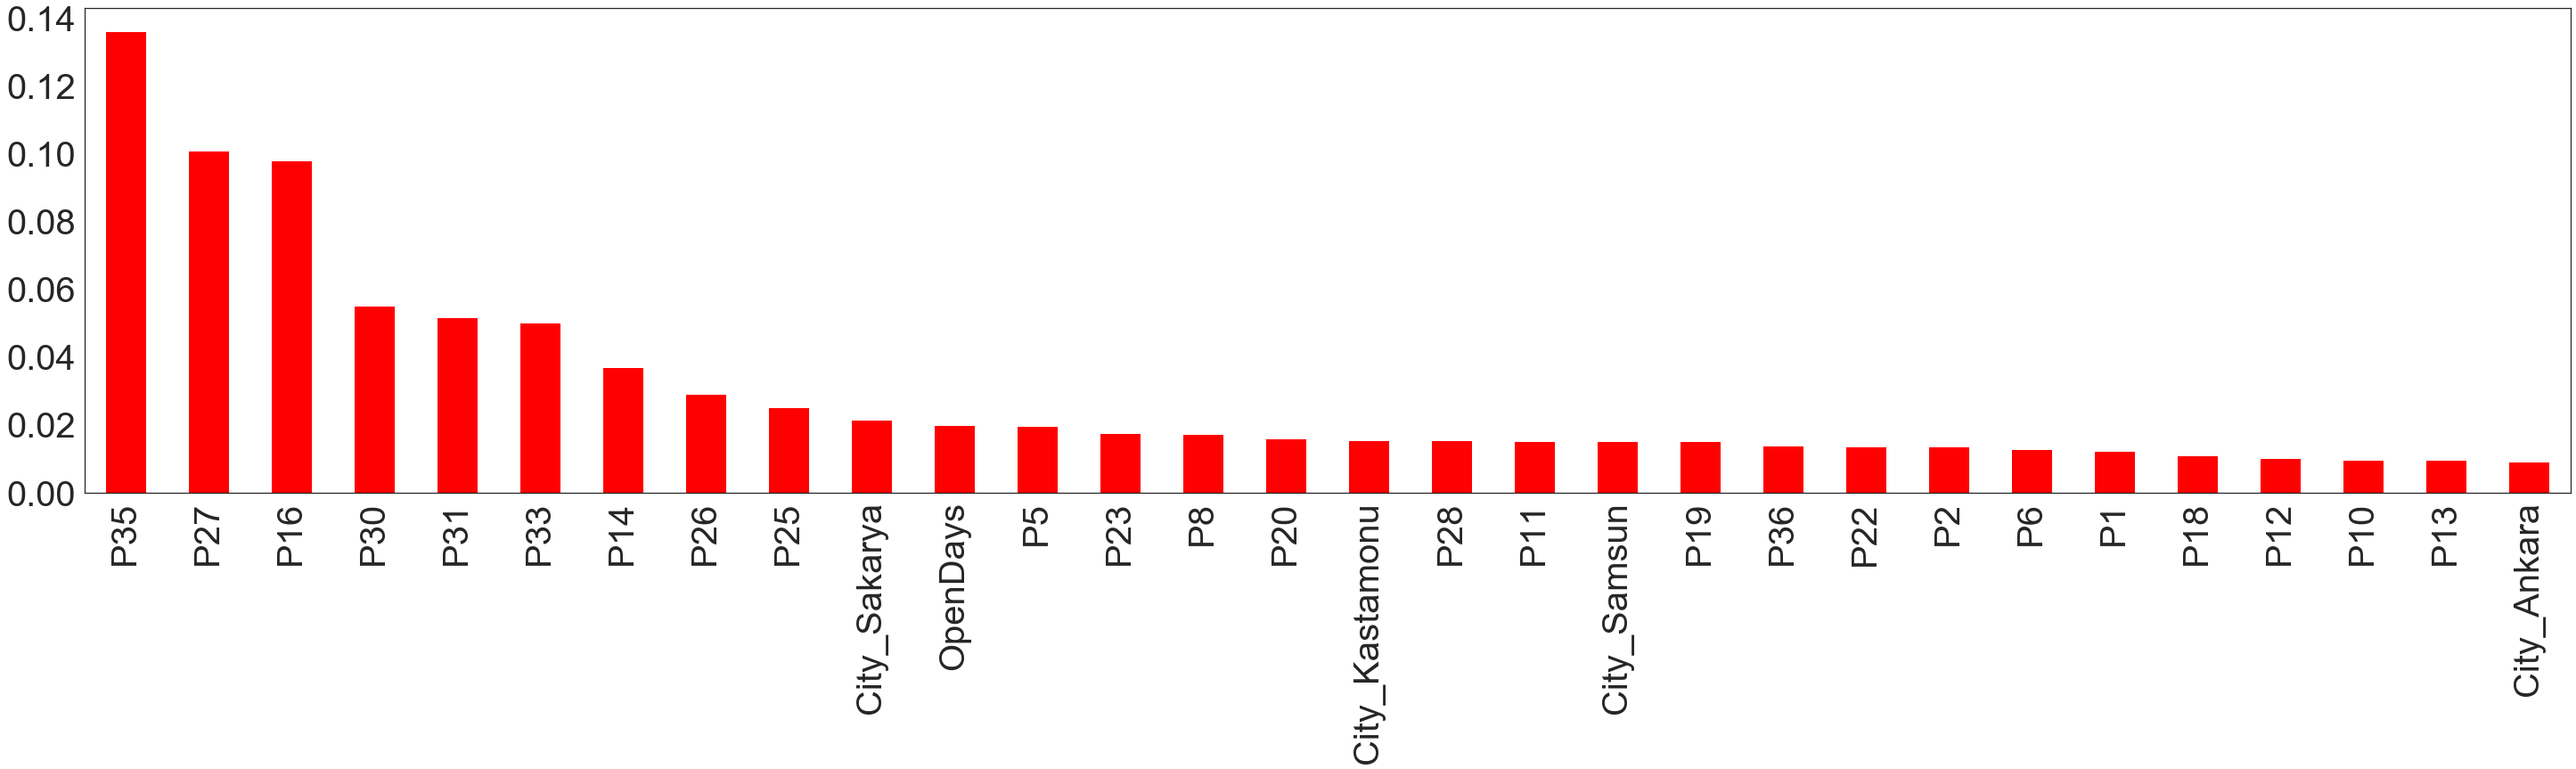

In [14]:
## Find most important features in dataset 

X = train_dummies_no_revenue.iloc[:,0:-2]  #independent columns
y = train_dummies_no_revenue.iloc[:,-1]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='bar', colormap = 'hsv', figsize = (50, 10), fontsize = 40)
plt.show()

In [15]:

def corr_check(name):
    column_corr = train.groupby(name).corr().reset_index().rename(columns = {'level_1':'Column'})[[name, 'Column', 'Id']]
    column_corr = column_corr.pivot(index = 'Column', columns = name).drop('Id')['Id']
    data = dict()
    index = column_corr.index
    for x in column_corr:
        temp = column_corr[x].abs()
        data[x] = temp.to_list()
    return pd.DataFrame(data, index = index)

In [16]:
#['City','City Group','Type']
corr_check('City').dropna(how = 'all', axis = 1).fillna(0).head()

,Adana,Ankara,Antalya,Aydın,Bursa,Diyarbakır,Eskişehir,Kayseri,Konya,Muğla,Sakarya,Samsun,Tekirdağ,Trabzon,İstanbul,İzmir
Column,,,,,,,,,,,,,,,,
OpenDays,0.838560,0.290771,0.160484,1.0,0.168853,0.657543,0.969806,0.292580,1.0,1.0,0.152254,0.911296,0.925853,1.0,0.159434,0.619923
P1,0.000000,0.095901,0.540291,1.0,0.097297,0.998568,0.000000,0.785443,0.0,1.0,0.119436,0.333143,0.000000,1.0,0.154230,0.427345
P10,0.000000,0.146780,0.354938,0.0,0.000000,0.998568,0.000000,0.679613,0.0,0.0,0.119436,0.000000,0.000000,1.0,0.173791,0.413870
P11,0.820505,0.087516,0.585789,1.0,0.596670,0.998568,0.991061,0.591917,1.0,1.0,0.167465,0.531391,0.866025,1.0,0.138414,0.384231
P12,0.933789,0.262112,0.061885,0.0,0.497022,0.998568,0.000000,0.557240,0.0,1.0,0.703928,0.000000,0.866025,1.0,0.143462,0.558243


In [17]:
corr_check('City Group').head()

,Big Cities,Other
Column,,
OpenDays,0.192261,0.022425
P1,0.054571,0.127769
P10,0.066356,0.157474
P11,0.066389,0.026475
P12,0.009248,0.148148


In [18]:
corr_check('Type').dropna(how = 'all', axis = 1).head()

,FC,IL
Column,,
OpenDays,0.079196,0.149421
P1,0.195646,0.226645
P10,0.175308,0.168919
P11,0.141419,0.228434
P12,0.168396,0.084945


In [19]:
## Build and train the classifier
# dt_model = sktree.DecisionTreeClassifier(max_depth=1,
#                                          criterion='entropy')


# dt_model.fit(train_dummies_no_revenue,train['revenue'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
# predicted_revenue = dt_model.predict(train_dummies_no_revenue)
# train['predicted_revenue'] = predicted_revenue
# train.sample(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays,predicted_revenue
68,68,2010-03-16,İstanbul,Big Cities,IL,2,4.0,3.0,4.0,2,...,5,5,4,4,4,3,4,3836721.0,3535,1270499.0
8,8,2010-08-28,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,...,5,5,3,4,5,4,5,4952497.0,3370,1270499.0
87,87,2008-02-11,İstanbul,Big Cities,FC,5,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,5906596.0,4299,1149870.0
49,49,2008-04-01,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,2,...,0,0,0,0,0,0,0,8630682.0,4249,1149870.0
32,32,2009-01-17,Şanlıurfa,Other,FC,3,4.0,3.0,4.0,3,...,0,0,0,0,0,0,0,3261924.0,3958,1270499.0
40,40,2011-02-09,İstanbul,Big Cities,IL,3,5.0,4.0,4.0,2,...,5,3,3,3,4,3,2,6836483.0,3205,1149870.0
86,86,2011-07-26,Bursa,Other,FC,3,3.0,4.0,4.0,2,...,0,0,0,0,0,0,0,3351383.0,3038,1270499.0
111,111,2012-08-10,Kütahya,Other,FC,2,3.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2993069.0,2657,1270499.0
30,30,2008-12-01,Sakarya,Other,IL,1,1.0,3.0,3.0,2,...,0,0,0,0,0,0,0,3008199.0,4005,1270499.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,2847,1149870.0


In [131]:
## Pipeline to determine best classifier 

y = train['revenue']
X = train.drop(['revenue'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [128]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [129]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).drop('revenue',axis=1).columns
categorical_features = train.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [130]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(nu=0.1,probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score((X_test, y_test)))
## Error: Expected 2d array, got 1d instead 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


ValueError: Expected 2D array, got 1D array instead:
array=[               City  City Group Type  P1   P2   P3   P4  P5  P6  P7  ...  P29  \
97         İstanbul  Big Cities   FC   3  5.0  4.0  4.0   1   4   5  ...  1.0   
85         İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2   5   5  ...  3.0   
131          Ankara  Big Cities   FC   3  4.0  4.0  5.0   3   4   5  ...  2.0   
136        İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2   2   5  ...  3.0   
124          Ankara  Big Cities   DT   1  3.0  0.0  5.0   5   5   1  ...  3.0   
57          Antalya       Other   FC   2  3.0  4.0  3.0   1   4   5  ...  2.0   
100        İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2   5   5  ...  3.0   
126         Isparta       Other   IL   3  3.0  4.0  4.0   2   2   5  ...  3.0   
95           Samsun       Other   FC   2  4.0  4.0  4.0   2   2   5  ...  3.0   
105           Aydın       Other   FC   1  2.0  5.0  3.0   1   2   1  ...  2.0   
55         İstanbul  Big Cities   FC   2  4.0  4.0  4.0   1   4   5  ...  3.0   
3             Tokat       Other   IL   6  4.5  6.0  6.0   4   4  10  ...  7.5   
72            İzmir  Big Cities   IL   3  5.0  4.0  4.0   2   2   5  ...  1.0   
82          Karabük       Other   FC   2  2.0  4.0  3.0   2   1   5  ...  3.0   
54            Muğla       Other   IL   2  4.0  5.0  4.0   1   1   3  ...  3.0   
106         Antalya       Other   FC   3  3.0  6.0  6.0   4   2   2  ...  7.5   
117          Ankara  Big Cities   IL   3  5.0  4.0  5.0   3   3   5  ...  1.0   
81         İstanbul  Big Cities   FC   2  4.0  4.0  4.0   1   3   5  ...  3.0   
94           Samsun       Other   FC   2  3.0  4.0  4.0   2   2   5  ...  3.0   
22          Kayseri       Other   FC   9  6.0  6.0  6.0   4   6  10  ...  7.5   
118        İstanbul  Big Cities   IL  12  7.5  7.5  4.5   2  10  10  ...  5.0   
98          Denizli       Other   FC   3  4.0  4.0  4.0   1   2   5  ...  3.0   
103        Tekirdağ       Other   FC   2  4.0  4.0  4.0   1   2   5  ...  2.0   
34         İstanbul  Big Cities   FC   4  5.0  4.0  4.0   1   3   5  ...  3.0   
122        İstanbul  Big Cities   IL  12  7.5  6.0  7.5   2   8  10  ...  2.5   
8    Afyonkarahisar       Other   IL   1  1.0  4.0  4.0   1   2   1  ...  3.0   
24         İstanbul  Big Cities   IL   5  5.0  3.0  5.0   2   2   5  ...  2.0   
52             Uşak       Other   FC   2  3.0  4.0  4.0   2   1   1  ...  3.0   

     P30  P31  P32  P33  P34  P35  P36  P37  OpenDays  
97     0    0    0    0    0    0    0    0      3949  
85     0    0    0    0    0    0    0    0      7256  
131    0    0    0    0    0    0    0    0      6222  
136    0    0    0    0    0    0    0    0      3731  
124    0    0    0    0    0    0    0    0      5206  
57     0    0    0    0    0    0    0    0      4168  
100    0    0    0    0    0    0    0    0      4442  
126    5    5    5    4    2    5    3    2      4139  
95     0    0    0    0    0    0    0    0      2720  
105    0    0    0    0    0    0    0    0      4266  
55     0    0    0    0    0    0    0    0      4116  
3     25   12   10    6   18   12   12    6      2847  
72     4    3    3    2    3    4    3    1      3758  
82     0    0    0    0    0    0    0    0      3556  
54     0    0    0    0    0    0    0    0      7472  
106    0    0    0    0    0    0    0    0      4174  
117    3    3    3    2    3    4    3    1      5075  
81     0    0    0    0    0    0    0    0      5086  
94     4    4    3    4    4    4    3    5      3025  
22     0    0    0    0    0    0    0    0      4889  
118   25    6   10    4   18   12   12    2      3616  
98     0    0    0    0    0    0    0    0      3175  
103    0    0    0    0    0    0    0    0      2905  
34     0    0    0    0    0    0    0    0      2799  
122   25   15   25    6   18    3   16    6      8258  
8      4    5    5    3    4    5    4    5      3370  
24     5    5    4    4    4    4    5    2      3712  
52     0    0    0    0    0    0    0    0      2198  

[28 rows x 41 columns]
 97     6694797.0
85     7495092.0
131    3199619.0
136    6363241.0
124    3810007.0
57     3258837.0
100    9652350.0
126    4015749.0
95     1270499.0
105    2792031.0
55     6941173.0
3      2675511.0
72     2525375.0
82     3807496.0
54     4651866.0
106    4888774.0
117    2018785.0
81     4066618.0
94     3753720.0
22     3956086.0
118    1847826.0
98     2344689.0
103    4429512.0
34     4100886.0
122    4286645.0
8      4952497.0
24     8904084.0
52     1763231.0
Name: revenue, dtype: float64].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [92]:
X_test

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,7430
37,37,Ankara,Big Cities,IL,2,3.0,4.0,3.0,1,5,...,3.0,5,5,5,3,4,4,3,1,3375
70,70,İstanbul,Big Cities,FC,4,5.0,4.0,4.0,1,4,...,3.0,0,0,0,0,0,0,0,0,4740
40,40,İstanbul,Big Cities,IL,3,5.0,4.0,4.0,2,2,...,2.0,5,5,3,3,3,4,3,2,3205
58,58,İstanbul,Big Cities,FC,3,4.0,4.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,2778
57,57,Antalya,Other,FC,2,3.0,4.0,3.0,1,4,...,2.0,0,0,0,0,0,0,0,0,4168
128,128,Ankara,Big Cities,FC,2,4.0,4.0,4.0,1,2,...,2.0,0,0,0,0,0,0,0,0,2958
88,88,Antalya,Other,FC,1,2.0,5.0,4.0,1,2,...,2.0,0,0,0,0,0,0,0,0,2323
135,135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,3308
120,120,Aydın,Other,FC,2,3.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,3015
